# AVIATION INDUSTRY INSIGHTS

Expanding a company into new industries requires market research and the strategic reallocation of resources. In this case, the client wants to purchase and operate commercial and private airplanes to diversify their company's portfolio. Specifically, they want to identify the lowest risk aircraft for the company which means they must have a proven track record of safety and reliability. This metric is provable by a long history of few or no incidents and aerodynamic efficiency. Another factor to consider is whether the aircraft is reliable in varying weather conditions. In addition, their structural design must be professional and have advanced safety features.

The stakeholders are the businessmen looking to expand their company. They can use this project in sourcing safe and low risk aircraft with few to little incidents or negative impacts to human life.

A combination of these factors will produce an airworthy craft with low risk factors, enhanced profitability and revenue growth for the company. Moreover, catering to both commercial and private demographics ensures an increased market share by offering a broad range of products and services.

This notebook will analyse the [Kaggle Aviation Accident Database & Synopses dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) to extract meaningful insights about aircraft risk and make reliable recommendations for purchase and product diversification to the head of the new aviation division. The output of this notebook will be valuable in reducing injuries caused by aircrafts. 

In [76]:
#Import the necessary packages and libraries to be used in the data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns

In [77]:
#load the data into a dataframe for easier analysis and display the first 5 values to see how the data looks like
df = pd.read_csv('AviationData.csv', encoding="ISO-8859-1", low_memory = False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


The Kaggle dataset

## Preliminary Analysis

In [78]:
#this method displays the total number of columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [79]:
#check for non-null count data, data type, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The 'Make','Model','Number of Engines','Engine Type', and 'Aircraft Category' columns would be the output recommended to the client. The 'Make' and 'Model' appear to have very few missing values compared to 'Aircraft.Category.' 

In [80]:
#find out about summary statistics such as mean and standard deviation
#additionally, find out the numerical value columns to identify which ones can be correlated if need be
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [81]:
#find out the total sum of missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [82]:
#find out if there are any duplicates which may obscure the data analysis leading to false recommendations
df.duplicated().sum()

0

# Preparing the Data
The client is interested in purchasing and operating low risk aircraft. The columns that are most relevant to determining risk appear to be 'Injury.Severity', 'Aircraft.damage','Aircraft.Category','Make', 'Model','Number.of.Engines', 'Engine.Type','Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', and 'Broad.phase.of.flight.'

In order to find out all the injuries caused by an aircraft, I want to combine the 'Total Fatal Injuries', 'Total Serious Injuries', and 'Total Minor Injuries' columns. Then form visualizations of these injuries compared against the 'Make', 'Model' and 'Engine Type' to make recommendations on the lowest risk these aircrafts may have on the human body.


In [83]:
#collect the useful columns impacting aircraft risk that will dictate the analysis going forward
df = df[['Injury.Severity','Make', 'Model','Aircraft.damage', 'Number.of.Engines', 'Engine.Type','Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight']]

In [84]:
#find out which aircrafts show us the most often to identify the most popular makes and models and concentrate risk
(df['Make'] + ' ' + df['Model']).value_counts().head(10)

Cessna 152         2168
Cessna 172         1254
Cessna 172N         996
Piper PA-28-140     812
Cessna 150          716
Cessna 172M         667
Cessna 172P         597
Cessna 150M         539
Piper PA-18         539
Piper PA-28-161     502
Name: count, dtype: int64

In [85]:
#create a combined Make and Model column since these values are unique to each aircraft
df['Combined'] = df['Make'] + ' ' + df['Model']
df['Combined'].head()

0     Stinson 108-3
1    Piper PA24-180
2       Cessna 172M
3      Rockwell 112
4        Cessna 501
Name: Combined, dtype: object

In [86]:
#drop missing values to now skew data wrongly
df_clean = df.dropna(subset=['Injury.Severity','Make', 'Model','Aircraft.damage', 'Number.of.Engines', 'Engine.Type','Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'])

In [87]:
#drop duplicates and create a random sample of 100 aircrafts since working with 88889 is difficult
unique_aircrafts = df_clean.drop_duplicates(subset = ['Combined'])
df_sample = unique_aircrafts.sample(n = 100, random_state= 42)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 28538 to 38518
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         100 non-null    object 
 1   Make                    100 non-null    object 
 2   Model                   100 non-null    object 
 3   Aircraft.damage         100 non-null    object 
 4   Number.of.Engines       100 non-null    float64
 5   Engine.Type             100 non-null    object 
 6   Total.Fatal.Injuries    100 non-null    float64
 7   Total.Serious.Injuries  100 non-null    float64
 8   Total.Minor.Injuries    100 non-null    float64
 9   Total.Uninjured         100 non-null    float64
 10  Weather.Condition       100 non-null    object 
 11  Broad.phase.of.flight   100 non-null    object 
 12  Combined                100 non-null    object 
dtypes: float64(5), object(8)
memory usage: 10.9+ KB


In [88]:
#derive descriptive statistics for new sample dataframe
df_sample.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.190000,0.430000,0.270000,0.220000,2.900000
std,0.614554,0.781801,0.583528,0.595946,15.981365
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.250000
max,4.000000,3.000000,3.000000,3.000000,152.000000


In [89]:
#using .apply() to get a 'Total Injuries' columns
def calculate_total(row):
    return row['Total.Fatal.Injuries'] + row['Total.Serious.Injuries'] + row['Total.Minor.Injuries']

df_sample['Total Injuries'] = df.apply(calculate_total, axis=1)

In [90]:
#display first 5 values of sampled dataframe
df_sample.head()


,Injury.Severity,Make,Model,Aircraft.damage,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Combined,Total Injuries
28538,Non-Fatal,Aerostar,S57-A,Substantial,0.0,Unknown,0.0,0.0,3.0,0.0,VMC,Approach,Aerostar S57-A,3.0
43119,Non-Fatal,Schramm,HELICYCLE,Substantial,1.0,Reciprocating,0.0,0.0,1.0,0.0,VMC,Maneuvering,Schramm HELICYCLE,1.0
16054,Non-Fatal,Eiriavion Oy,PIK-20E,Substantial,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Descent,Eiriavion Oy PIK-20E,0.0
20175,Non-Fatal,Champion,7CCM,Substantial,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Landing,Champion 7CCM,0.0
29245,Non-Fatal,Bell,206-L-1,Substantial,1.0,Turbo Shaft,0.0,0.0,0.0,2.0,VMC,Landing,Bell 206-L-1,0.0


In [91]:
#reset the index to start from 0
df_sample.reset_index(inplace = True, drop = True)

In [92]:
#check dataframe for new index column
df_sample

,Injury.Severity,Make,Model,Aircraft.damage,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Combined,Total Injuries
0,Non-Fatal,Aerostar,S57-A,Substantial,0.0,Unknown,0.0,0.0,3.0,0.0,VMC,Approach,Aerostar S57-A,3.0
1,Non-Fatal,Schramm,HELICYCLE,Substantial,1.0,Reciprocating,0.0,0.0,1.0,0.0,VMC,Maneuvering,Schramm HELICYCLE,1.0
2,Non-Fatal,Eiriavion Oy,PIK-20E,Substantial,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Descent,Eiriavion Oy PIK-20E,0.0
3,Non-Fatal,Champion,7CCM,Substantial,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Landing,Champion 7CCM,0.0
4,Non-Fatal,Bell,206-L-1,Substantial,1.0,Turbo Shaft,0.0,0.0,0.0,2.0,VMC,Landing,Bell 206-L-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Non-Fatal,Continental Copters,MK6B,Substantial,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Maneuvering,Continental Copters MK6B,0.0
96,Non-Fatal,Gyaki,SKYBOLT,Substantial,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Cruise,Gyaki SKYBOLT,0.0
97,Non-Fatal,Brokaw,BULLET,Substantial,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Takeoff,Brokaw BULLET,0.0
98,Incident,Boeing,B767-232,Minor,2.0,Turbo Fan,0.0,0.0,0.0,53.0,VMC,Takeoff,Boeing B767-232,0.0


In [93]:
df_sample['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal    66
Fatal(1)     13
Fatal(2)     12
Incident      7
Fatal(3)      2
Name: count, dtype: int64

# Data Visualization

### Plot of Make & Model Against Total Injuries

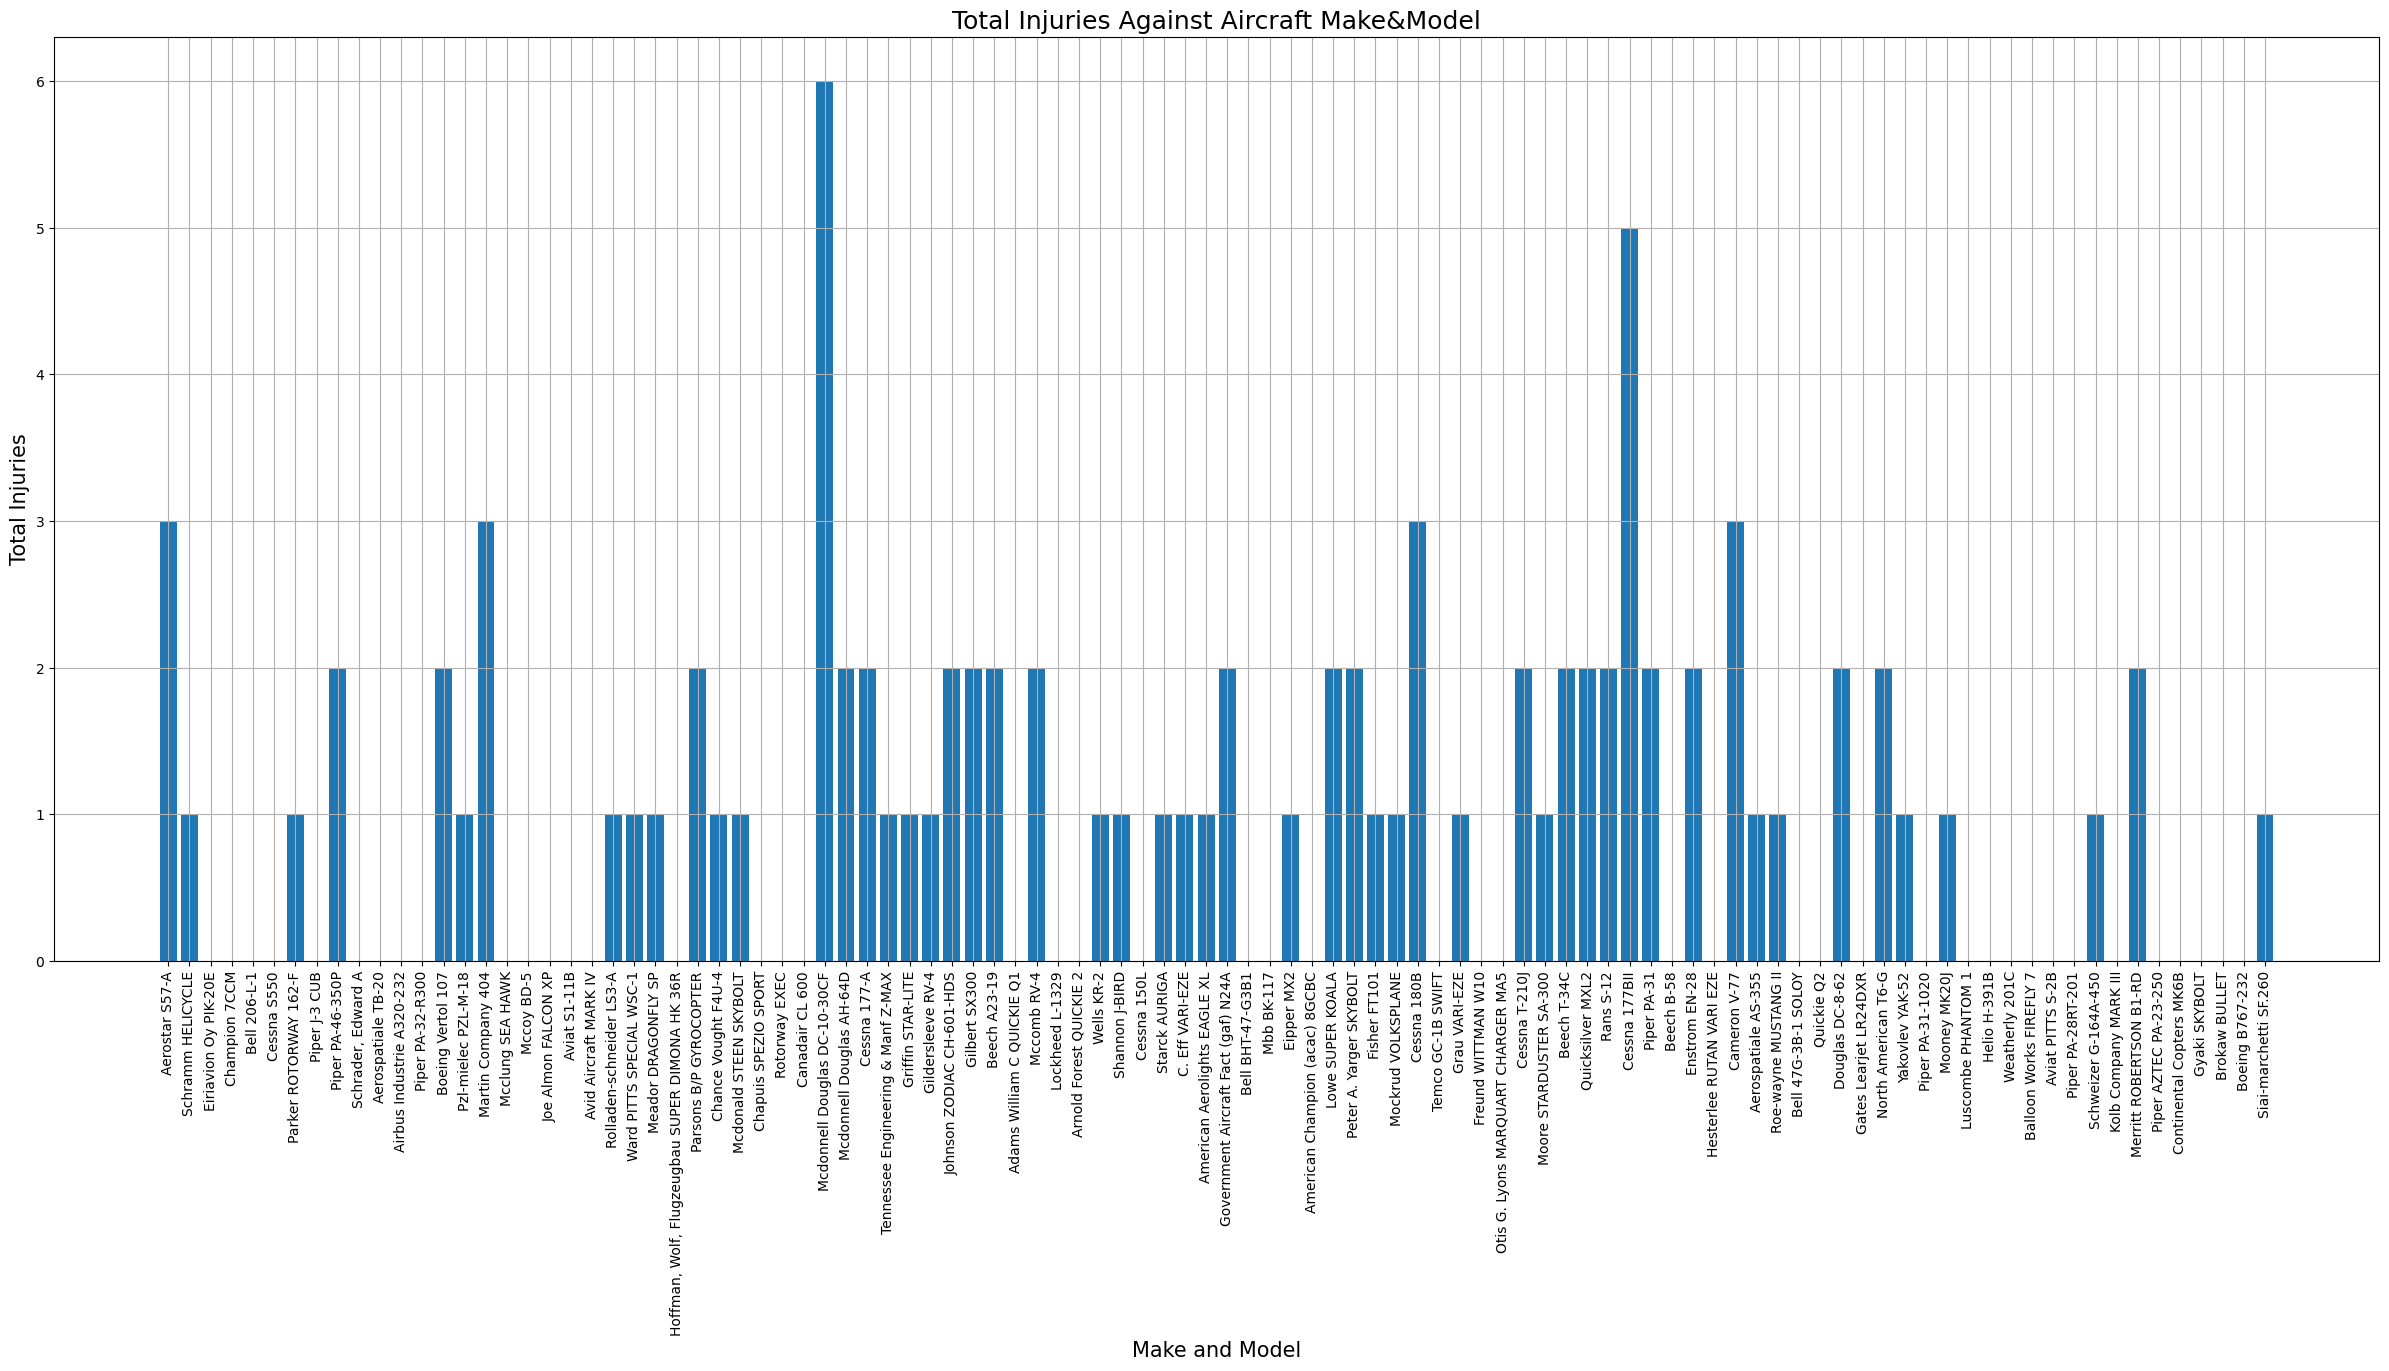

In [94]:
#Barplot Aircraft Make against Total Injuries
labels = df_sample['Combined'].tolist() #create labels from the make and model columns
fig = plt.figure(figsize=(30,12)) #create a canvas
y = df_sample['Total Injuries']
x = df_sample['Combined']

#First plot
plt.bar(x,y) #chart a barplot
plt.title('Total Injuries Against Aircraft Make&Model', fontsize = 18)
plt.xlabel('Make and Model', fontsize = 15)
plt.ylabel('Total Injuries', fontsize = 15)
plt.grid(True)
plt.xticks(x, labels, rotation='vertical')
plt.show()


The ideal amount of injuries would be 0. The aircrafts that yield this outcome include Eiriavion Oy PIK-20E, Champion 7CCM, Cessna S550, Piper J5-C, Aerospatiale TB-20, Airbus Industrie A320-232, Piper PA-32-R300, Boeing 747-243B, Mccoy BD-5, Joe Almon FALCON XP, Aviat S1-11B, Ferguson FERGY II, Hoffman, Wolf, Flugzeugbau SUPER DIMONA HK 36R, Rotorway EXEC, Canadair CL 600, Douglas DC-8-63, Adams William C QUICKIE Q1, Lockheed L-1329, Arnold Forest QUICKIE 2, Cessna 150L, Bell BHT-47-G3B1, Mbb BK-117, American Champion (acac) 8GCBC, Temco GC-1B SWIFT, Otis G. Lyons MARQUART CHARGER MA5, Drlik FALCON XC, Beech B-58, Hesterlee RUTAN VARI EZE, Bell 47G-3B-1 SOLOY, Quickie Q2, Gates Learjet LR24DXR, Wsk Pzl Mielec M-18A DROMADER, Piper PA-31-1020, Luscombe PHANTOM 1, Helio H-391B, Weatherly 201C, Balloon Works FIREFLY 7, Aviat PITTS S-2B, Piper PA-28RT-201, Kolb Company MARK III, Piper AZTEC PA-23-250, Continental Copters MK6B, Gyaki SKYBOLT,Brokaw BULLET, and Boeing B767-232.

However, the Mcdonnell Douglas DC-10-30CF is a high risk aircraft with the highest total injury count at 6.
Followed closely by the Cessna 177BII with a total injury count at 5.

### Plot of Total Injuries Against Broad Phase of Flight

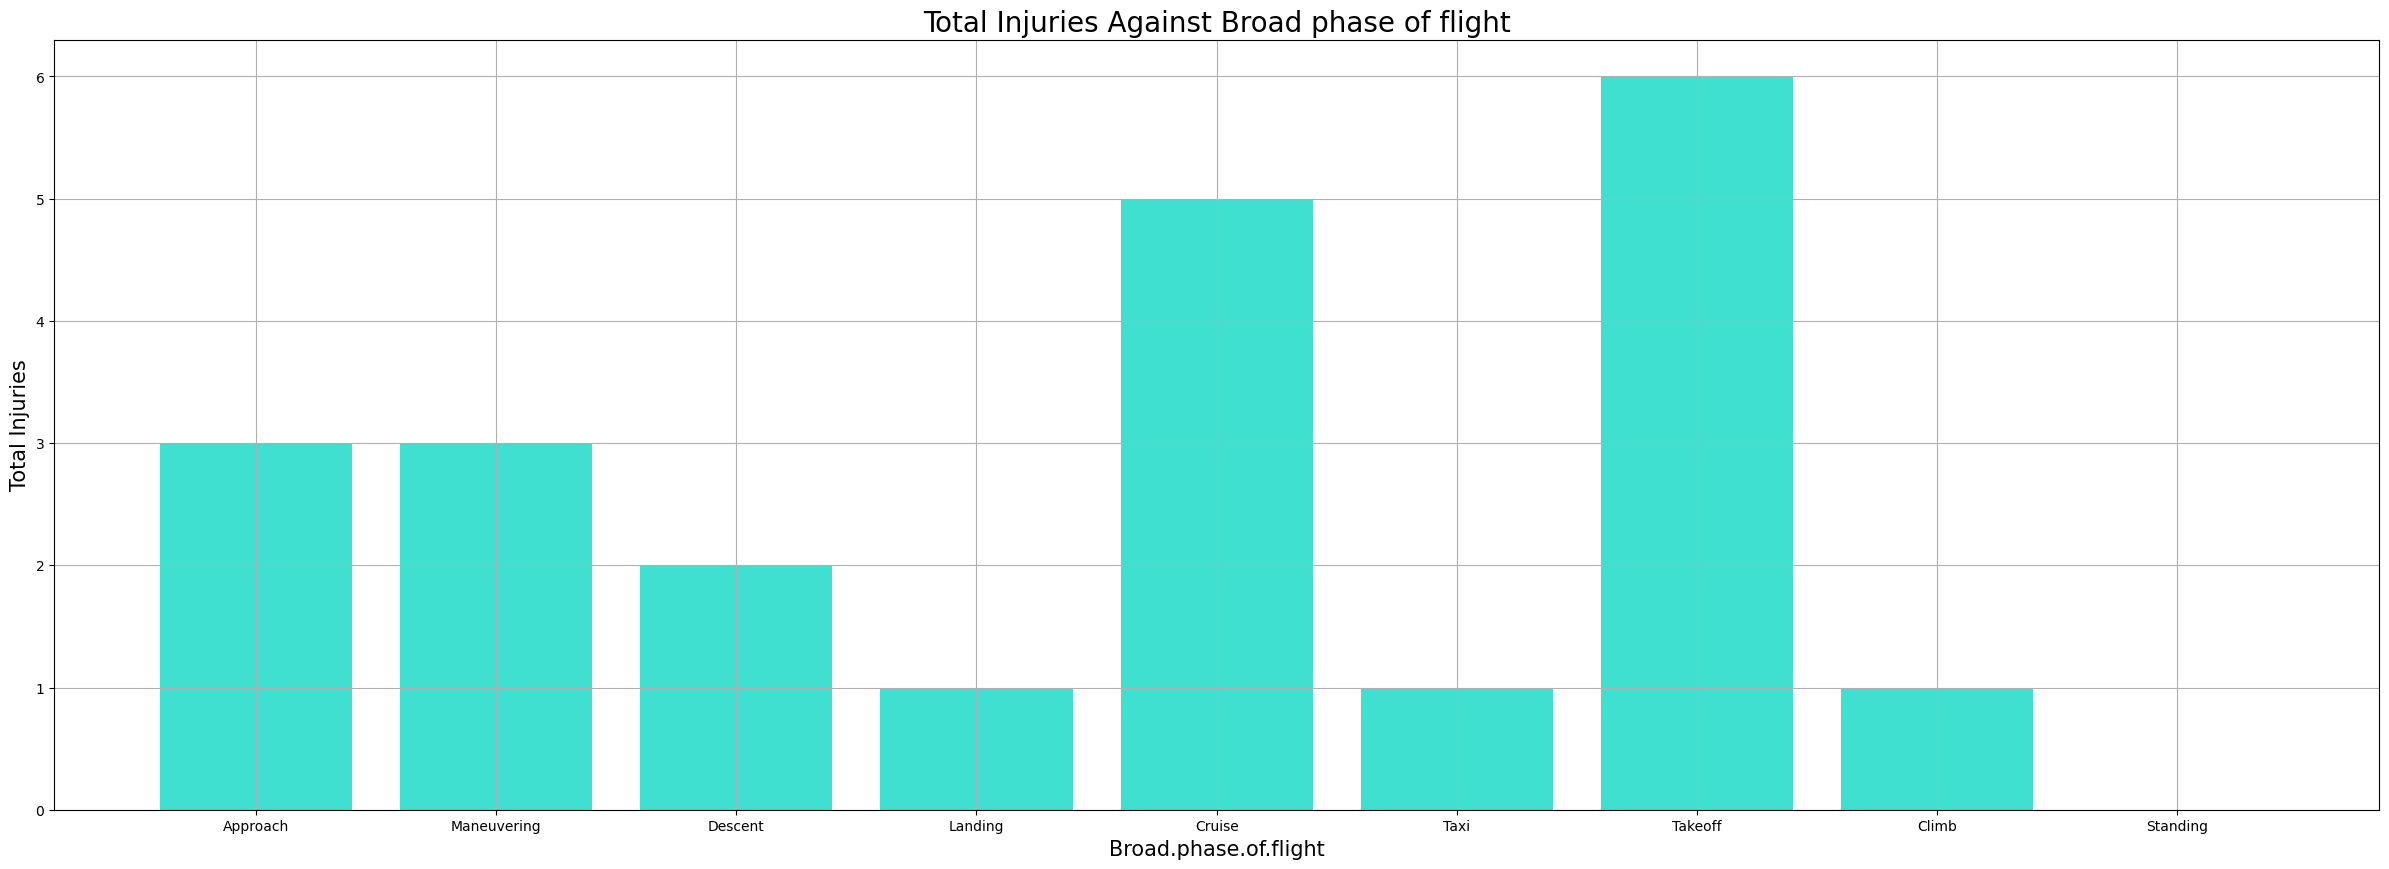

In [95]:
plt.figure(figsize=(30,10))
y = df_sample['Total Injuries']
x = df_sample['Broad.phase.of.flight']
plt.title('Total Injuries Against Broad phase of flight', fontsize = 20)
plt.xlabel('Broad.phase.of.flight', fontsize = 15)
plt.ylabel('Total Injuries', fontsize = 15)
plt.bar(x,y, color = 'turquoise')

plt.grid(True)

Most injuries happen during the takeoff and cruise phases of flight.

### Plot of Total Injuries Against Engine Type

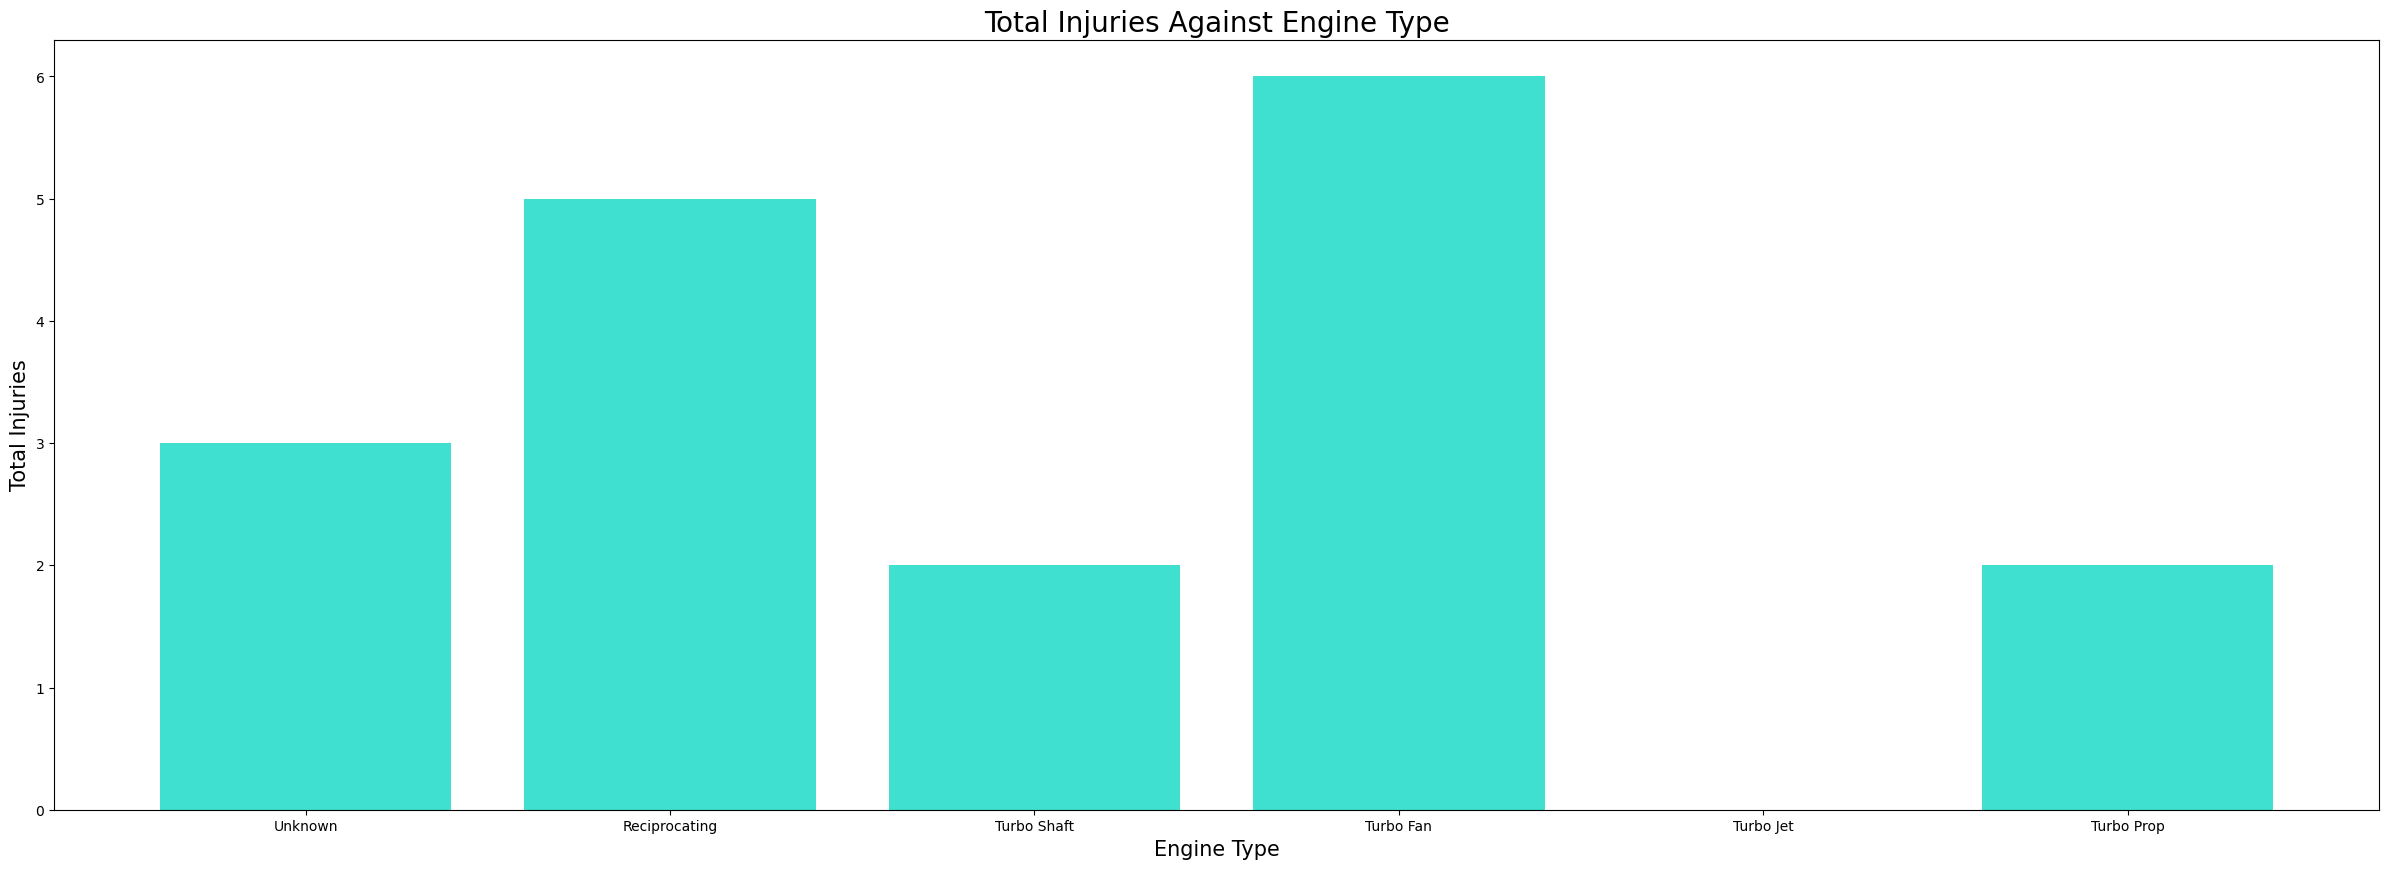

In [96]:
plt.figure(figsize=(30,10))
x =df_sample['Engine.Type']
y = df_sample['Total Injuries']
plt.title('Total Injuries Against Engine Type', fontsize = 20)
plt.xlabel('Engine Type',fontsize = 15)
plt.ylabel('Total Injuries', fontsize = 15)
plt.bar(x,y, color = 'turquoise')
plt.show()


The Turboject Engine is the safest as it has 0 total injuries, however, the turbofan and reciprocating engines are high risk.
Turbo Shaft and Turbo Prop engines also reduce risk to injuries

### Total Injuries Against Number of Engines

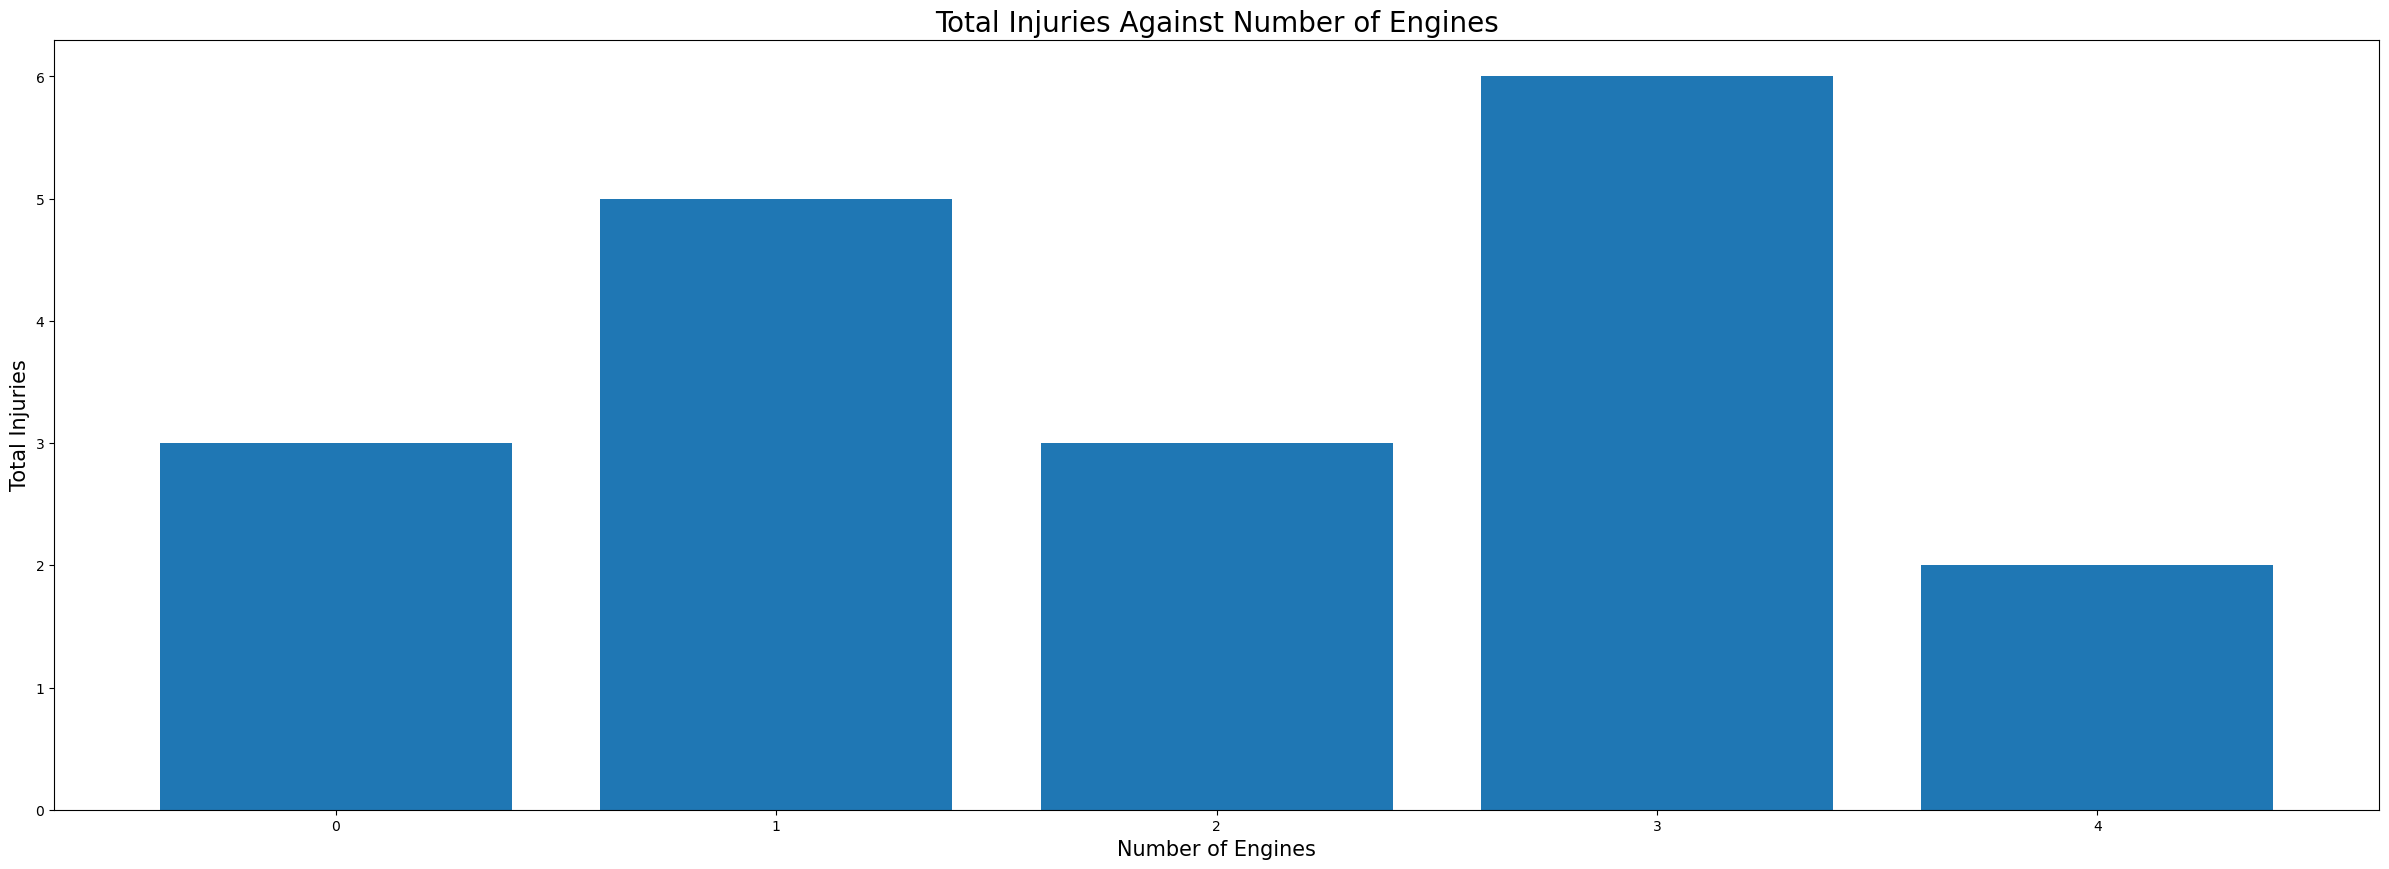

In [97]:
plt.figure(figsize=(30,10))
y = df_sample['Total Injuries']
x = df_sample['Number.of.Engines']
plt.title('Total Injuries Against Number of Engines', fontsize = 20)
plt.xlabel('Number of Engines',fontsize = 15)
plt.ylabel('Total Injuries', fontsize = 15)
plt.bar(x,y)
plt.show()


Aircrafts with 4 engines tended to have the lowest injury totals, whereas odd-numbered engines at 3 and 1 engines were the most dangerous.

In [98]:
#visualize aircrafts with 4 and 2 engines
safest_engine_number = df_sample[df_sample['Number.of.Engines'] == 4] #create dataframe of 4 engine aircrafts
safest_engine_number


,Injury.Severity,Make,Model,Aircraft.damage,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Combined,Total Injuries
42,Non-Fatal,Lockheed,L-1329,Substantial,4.0,Turbo Jet,0.0,0.0,0.0,3.0,VMC,Landing,Lockheed L-1329,0.0
79,Non-Fatal,Douglas,DC-8-62,Destroyed,4.0,Turbo Fan,0.0,0.0,2.0,3.0,VMC,Takeoff,Douglas DC-8-62,2.0


In [99]:
second_safest_engine_number = df_sample[df_sample['Number.of.Engines'] == 2] #create dataframe of 2 engine aircrafts
second_safest_engine_number

,Injury.Severity,Make,Model,Aircraft.damage,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Combined,Total Injuries
5,Incident,Cessna,S550,Minor,2.0,Turbo Fan,0.0,0.0,0.0,5.0,VMC,Cruise,Cessna S550,0.0
11,Non-Fatal,Airbus Industrie,A320-232,Substantial,2.0,Turbo Fan,0.0,0.0,0.0,152.0,VMC,Takeoff,Airbus Industrie A320-232,0.0
13,Fatal(2),Boeing Vertol,107,Destroyed,2.0,Turbo Shaft,2.0,0.0,0.0,0.0,VMC,Maneuvering,Boeing Vertol 107,2.0
15,Fatal(3),Martin Company,404,Destroyed,2.0,Reciprocating,3.0,0.0,0.0,0.0,VMC,Takeoff,Martin Company 404,3.0
30,Incident,Canadair,CL 600,Minor,2.0,Turbo Fan,0.0,0.0,0.0,4.0,IMC,Descent,Canadair CL 600,0.0
32,Fatal(1),Mcdonnell Douglas,AH-64D,Substantial,2.0,Turbo Shaft,1.0,1.0,0.0,2.0,VMC,Approach,Mcdonnell Douglas AH-64D,2.0
50,Fatal(2),Government Aircraft Fact (gaf),N24A,Destroyed,2.0,Turbo Prop,2.0,0.0,0.0,0.0,IMC,Approach,Government Aircraft Fact (gaf) N24A,2.0
52,Incident,Mbb,BK-117,Minor,2.0,Turbo Shaft,0.0,0.0,0.0,1.0,UNK,Standing,Mbb BK-117,0.0
70,Fatal(2),Piper,PA-31,Destroyed,2.0,Reciprocating,2.0,0.0,0.0,0.0,VMC,Approach,Piper PA-31,2.0
71,Non-Fatal,Beech,B-58,Substantial,2.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Landing,Beech B-58,0.0


### Combined Plot of Injury Severity and Total Injuries Against Aircraft Make and Model

In [100]:
df_sample['Injury.Severity'] = df_sample['Injury.Severity'].map({'Incident':0, 'Non-Fatal':1, 'Fatal(1)':2,'Fatal(2)':3,'Fatal(3)':4,'Fatal(8)':5}) 

c:\Users\pc\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


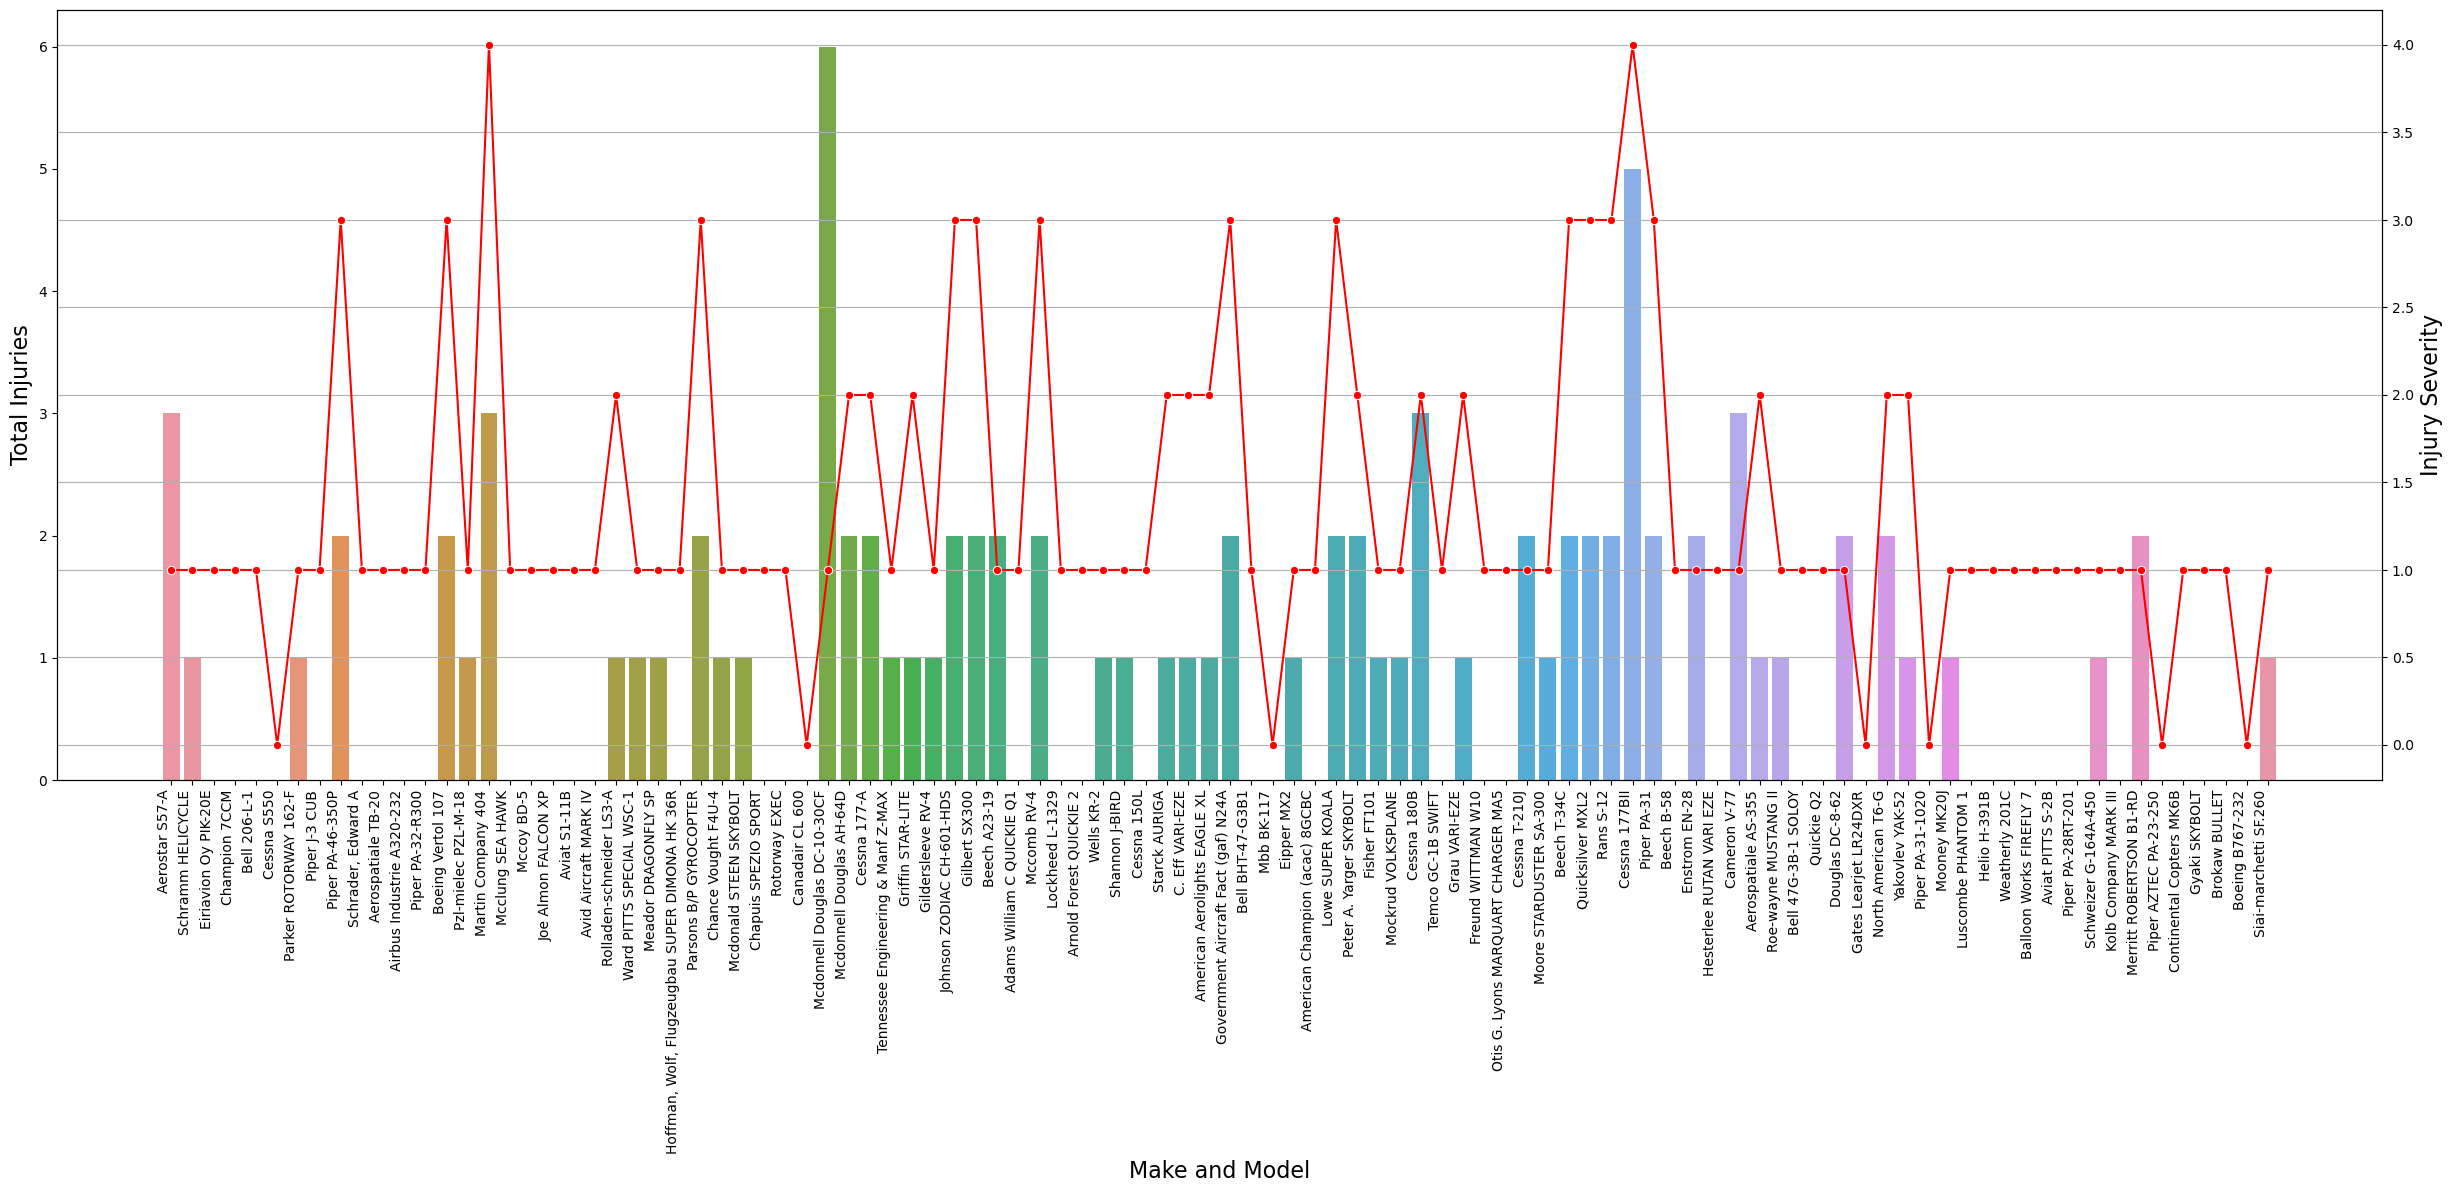

<Figure size 640x480 with 0 Axes>

In [101]:
df_p = pd.DataFrame({
    'Make&Model': df_sample['Combined'].tolist(),
    'Total_Injury': df_sample['Total Injuries'].tolist(),
    'Injury_Severity': df_sample['Injury.Severity'].tolist()
})

fig, ax1 = plt.subplots(figsize=(30,10))
sns.barplot(x='Make&Model', y='Total_Injury', data=df_p, ax=ax1)

ax1.set_xticklabels(df_p['Make&Model'], rotation='vertical', ha='right')
# ax1.grid(True)
ax1.set_ylabel('Total Injuries', fontsize = 16)
ax1.set_xlabel('Make and Model', fontsize = 16)

ax2 = ax1.twinx()
sns.lineplot(x='Make&Model', y='Injury_Severity', data=df_p, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Injury Severity', fontsize = 16)
ax2.grid(True)

plt.show()
plt.tight_layout()


Despite having a high number of total injuries, the Mcdonnell Douglas DC-10-30CF has a low injury severity rate with most being non-fatal. 

However, the Cessna 177BII remains consistent with a high total injury count and fatalities amounting to 4.

Of the aircrafts identified earlier, the Cessna S550, Canadair CL 600, Douglas DC-8-63, Atr 72-212, Mbb BK-117, Gates Learjet LR24DXR, Piper PA-31-1020, Piper AZTEC PA-23-250 and Boeing B767-232 are the safest with 0 fatalities and 0 total injuries.

The Gates Learjet LR24DXR is a 2-engine, turbojet engine craft and has low injury severity and total injuries. Its also primarily a private aircraft.

The Lockheed L-1329 is additionally a private craft with a 4-engine turbojet engine with a relatively low fatality count and zero total injuries

### Plot of Aircraft Damage Against Make and Model

In [102]:
#identify the ariables in the column and their counts/frequency
df_sample['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    57
Destroyed      35
Minor           8
Name: count, dtype: int64

In [103]:
#since i want to work with numerican data, map the 'Aircraft damage' column onto integers
df_sample['Aircraft.damage'] = df_sample['Aircraft.damage'].map({'Minor':1,'Substantial':2,'Destroyed':3}) 

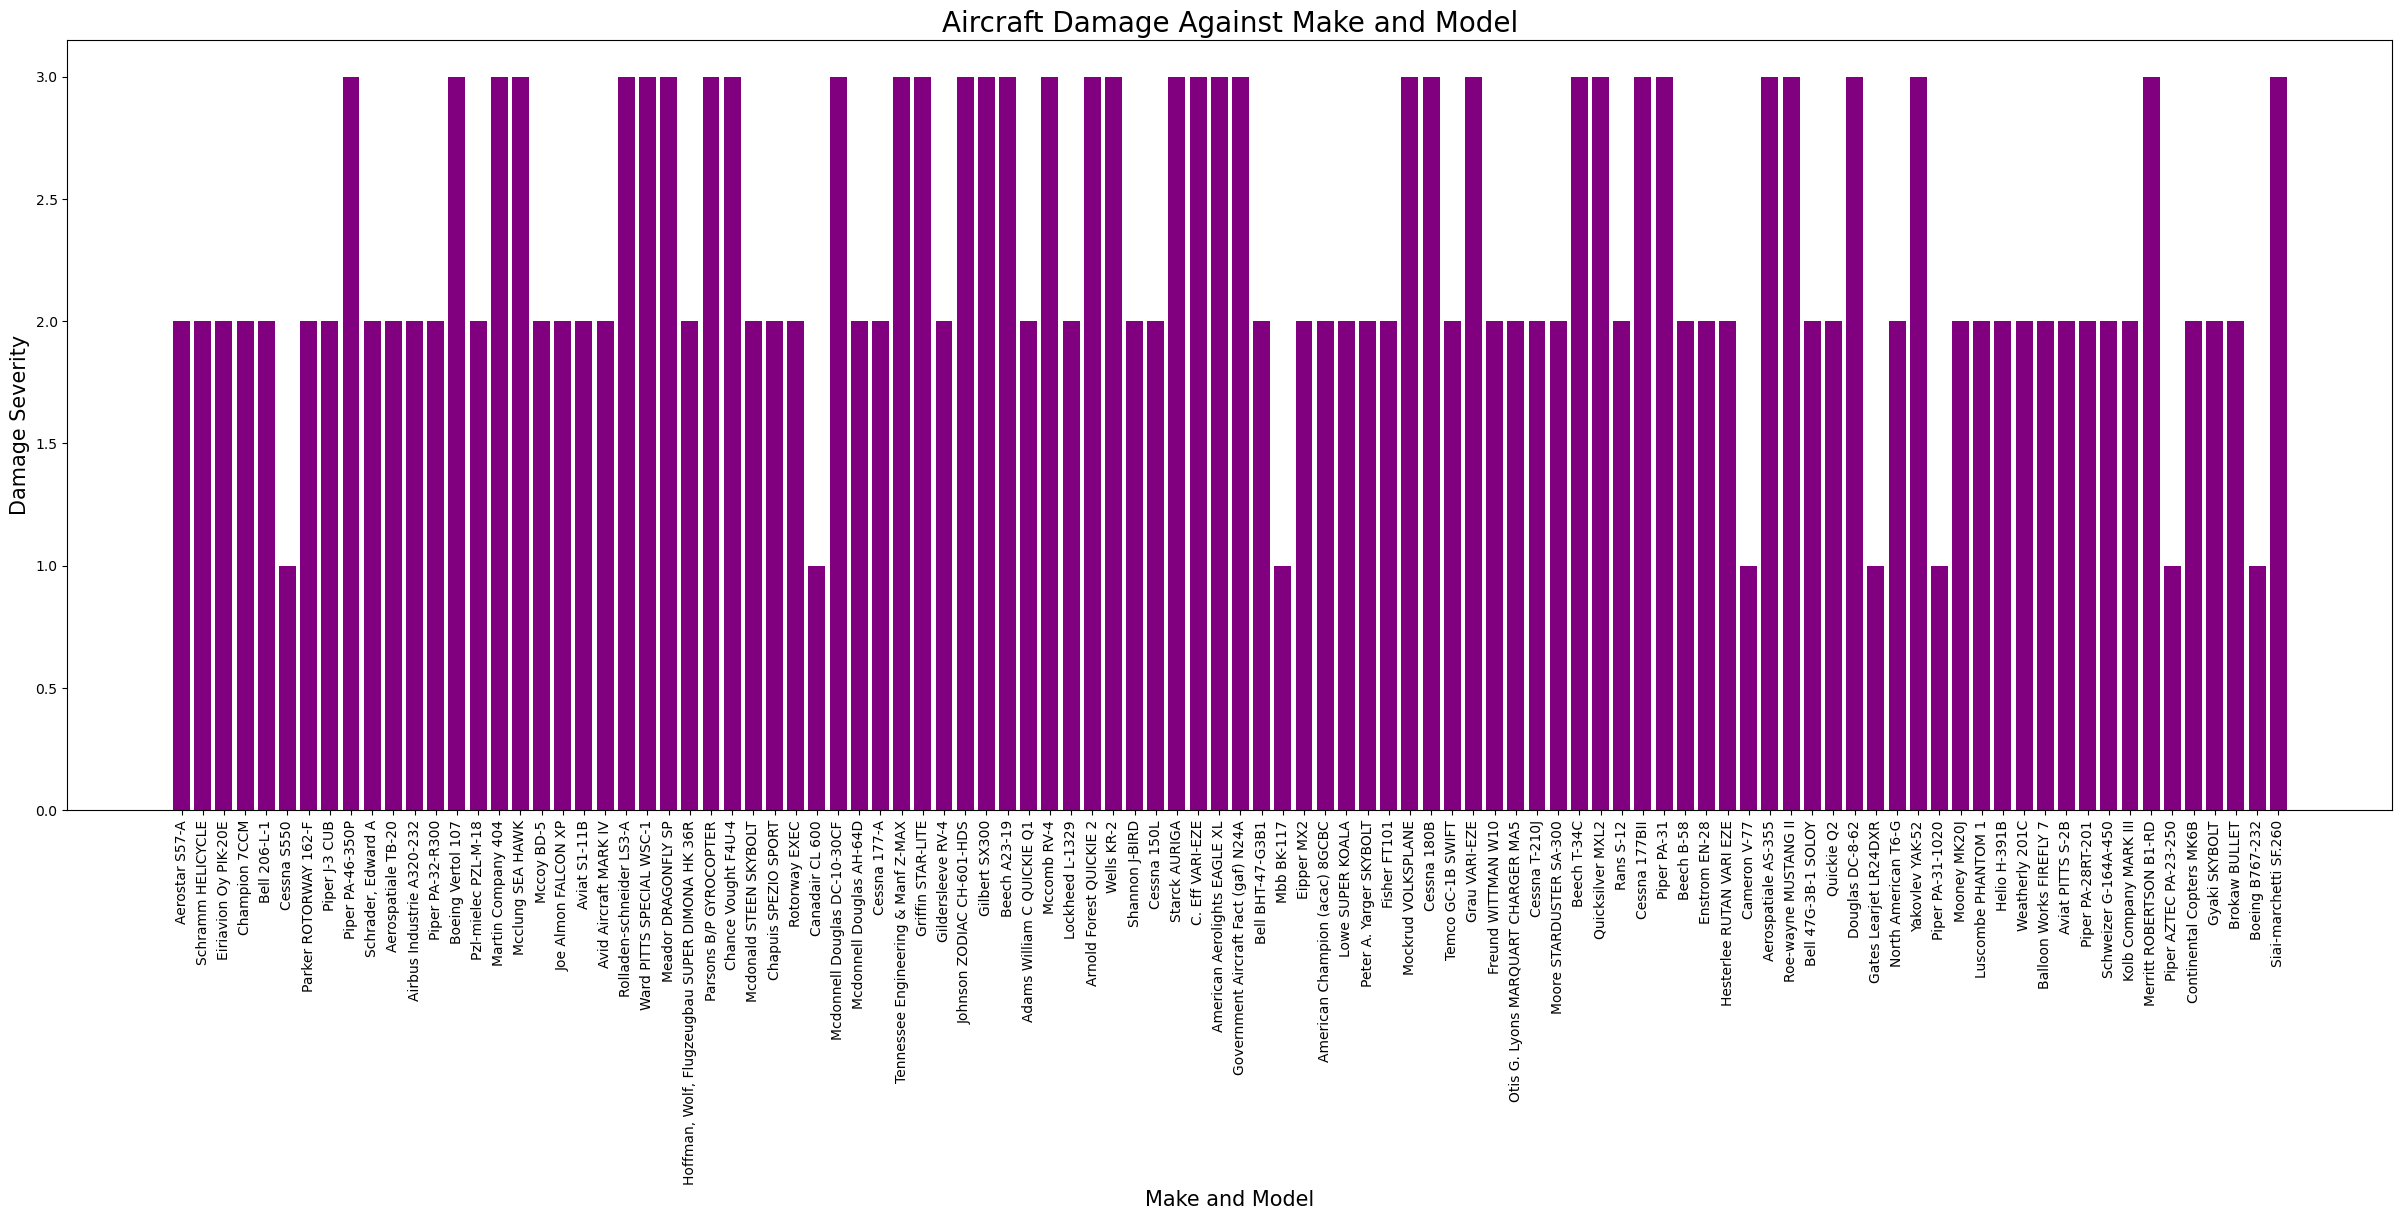

In [104]:
#create a barplot
plt.figure(figsize=(30,10)) #set canvas
y = df_sample['Aircraft.damage']
x = df_sample['Combined']
plt.title('Aircraft Damage Against Make and Model', fontsize = 20)
plt.xlabel('Make and Model',fontsize = 15)
plt.ylabel('Damage Severity', fontsize = 15)
plt.bar(x,y, color = 'purple')
plt.xticks(rotation='vertical')
plt.show()


These aircrafts that had the littlest amount of damage with 1 indicating that they had minor damage:
'Cessna S550',
 'Canadair CL 600',
 'Mbb BK-117',
 'Cameron V-77',
 'Gates Learjet LR24DXR',
 'Piper PA-31-1020',
 'Piper AZTEC PA-23-250',
 'Boeing B767-232'

 Of the aircrafts with minor damage, the following are commercial ones: 
 Canadair CL 600, Piper PA-31-1020, Piper AZTEC PA-23-250, and Boeing B767-232. The rest are private crafts.
 

In [105]:
#convert the sampled dataframe to an excel sheet for exportation into tableau
df_sample.to_excel('dfsample.xlsx', sheet_name='Sheet1', index = False)

In conclusion, the recommended output should have the lowest total injuries, aircraft damage, and injury severity.
This ensures minimal funds are spent on liability claims, repairs, or purchasing new aircrafts.

The aircrafts that best fit this criteria are:

Commercial: Boeing B767-232,
            Canadair CL 600

Private: Gates Learjet LR24DXR,
         Lockheed L-1329

These planes will brings value to the company and mitigate the risk that comes with injury to human life. Moreover, they will ensure the expansion of the company portfolio is profitable and of value to the company's stakeholders.